# Crystal Structure Lowest Distortion Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d saurabhshahane/crystal-structure-classification

Dataset URL: https://www.kaggle.com/datasets/saurabhshahane/crystal-structure-classification
License(s): Attribution 4.0 International (CC BY 4.0)
100%|█████████████████████████████████████████| 750k/750k [00:01<00:00, 565kB/s]
100%|█████████████████████████████████████████| 750k/750k [00:01<00:00, 565kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Crystal Structure Classification/crystal-structure-classification.zip', 'r')
zip_ref.extractall("/home/bhxveshhh/ML/Crystal Structure Classification")
zip_ref.close()

## Explaratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel("Supplementary Information File 1 (SIF-1).xlsx")

In [6]:
df.head()

,S.No,Compound,A,B,In literature,Lowest distortion,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ
0,1,Ac2O3,Ac,Ac,False,cubic,element not in BV,element not in BV,1.12,1.12,1.12,1.1,1.10,0.0,0.000000,-3.248000,0.707107,-,0.800000
1,2,AcAgO3,Ac,Ag,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.95,1.1,1.93,0.0,2.488353,-2.565071,0.758259,-,0.678571
2,3,AcAlO3,Ac,Al,False,cubic,element not in BV,element not in BV,1.12,1.12,0.54,1.1,1.61,0.0,1.892894,-1.846714,0.918510,-,0.385714
3,4,AcAsO3,Ac,As,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.52,1.1,2.18,0.0,1.932227,-1.577429,0.928078,-,0.371429
4,5,AcAuO3,Ac,Au,False,orthorhombic,element not in BV,element not in BV,1.12,1.12,0.93,1.1,2.54,0.0,2.313698,-2.279786,0.764768,-,0.664286


In [7]:
df.shape

(5329, 19)

In [8]:
df.size

101251

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5329 entries, 0 to 5328
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               5329 non-null   int64  
 1   Compound           5329 non-null   object 
 2   A                  5329 non-null   object 
 3   B                  5329 non-null   object 
 4   In literature      5329 non-null   bool   
 5   Lowest distortion  5329 non-null   object 
 6   v(A)               5329 non-null   object 
 7   v(B)               5329 non-null   object 
 8   r(AXII)(Å)         5329 non-null   float64
 9   r(AVI)(Å)          5329 non-null   float64
 10  r(BVI)(Å)          5329 non-null   float64
 11  EN(A)              5329 non-null   float64
 12  EN(B)              5329 non-null   float64
 13  l(A-O)(Å)          5329 non-null   float64
 14  l(B-O)(Å)          5329 non-null   float64
 15  ΔENR               5329 non-null   float64
 16  tG                 5329 

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No,5329.0,2665.000000,1538.494123,1.000000,1333.000000,2665.000000,3997.000000,5329.000000
r(AXII)(Å),5329.0,0.974656,0.337139,0.270000,0.690000,0.930000,1.180000,1.880000
r(AVI)(Å),5329.0,0.825617,0.245000,0.270000,0.630000,0.800000,0.950000,1.670000
r(BVI)(Å),5329.0,0.817845,0.247480,0.270000,0.630000,0.770000,0.950000,1.670000
EN(A),5329.0,1.572466,0.449248,0.790000,1.200000,1.550000,1.930000,2.540000
EN(B),5329.0,1.572466,0.449248,0.790000,1.200000,1.550000,1.930000,2.540000
l(A-O)(Å),5329.0,2.289800,0.664239,0.000000,2.290644,2.393444,2.571812,3.300176
l(B-O)(Å),5329.0,2.012587,0.598509,0.000000,1.956808,2.096141,2.286435,3.009747
ΔENR,5329.0,-2.199993,0.668465,-5.411536,-2.604821,-2.101179,-1.711500,-0.601714
tG,5329.0,0.766090,0.136280,0.384648,0.668537,0.756440,0.850628,1.388809


In [11]:
df.isnull().sum()

S.No                 0
Compound             0
A                    0
B                    0
In literature        0
Lowest distortion    0
v(A)                 0
v(B)                 0
r(AXII)(Å)           0
r(AVI)(Å)            0
r(BVI)(Å)            0
EN(A)                0
EN(B)                0
l(A-O)(Å)            0
l(B-O)(Å)            0
ΔENR                 0
tG                   0
τ                    0
μ                    0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

S.No                 5329
Compound             5329
A                      73
B                      73
In literature           2
Lowest distortion       5
v(A)                    7
v(B)                    7
r(AXII)(Å)             75
r(AVI)(Å)              51
r(BVI)(Å)              68
EN(A)                  56
EN(B)                  56
l(A-O)(Å)              69
l(B-O)(Å)              69
ΔENR                 4912
tG                   2936
τ                    1608
μ                      67
dtype: int64

In [ ]:
df['Lowest distortion'].value_counts()

Lowest distortion
1    3253
2    1573
3     323
4     127
0      53
Name: count, dtype: int64

## Data Visualization

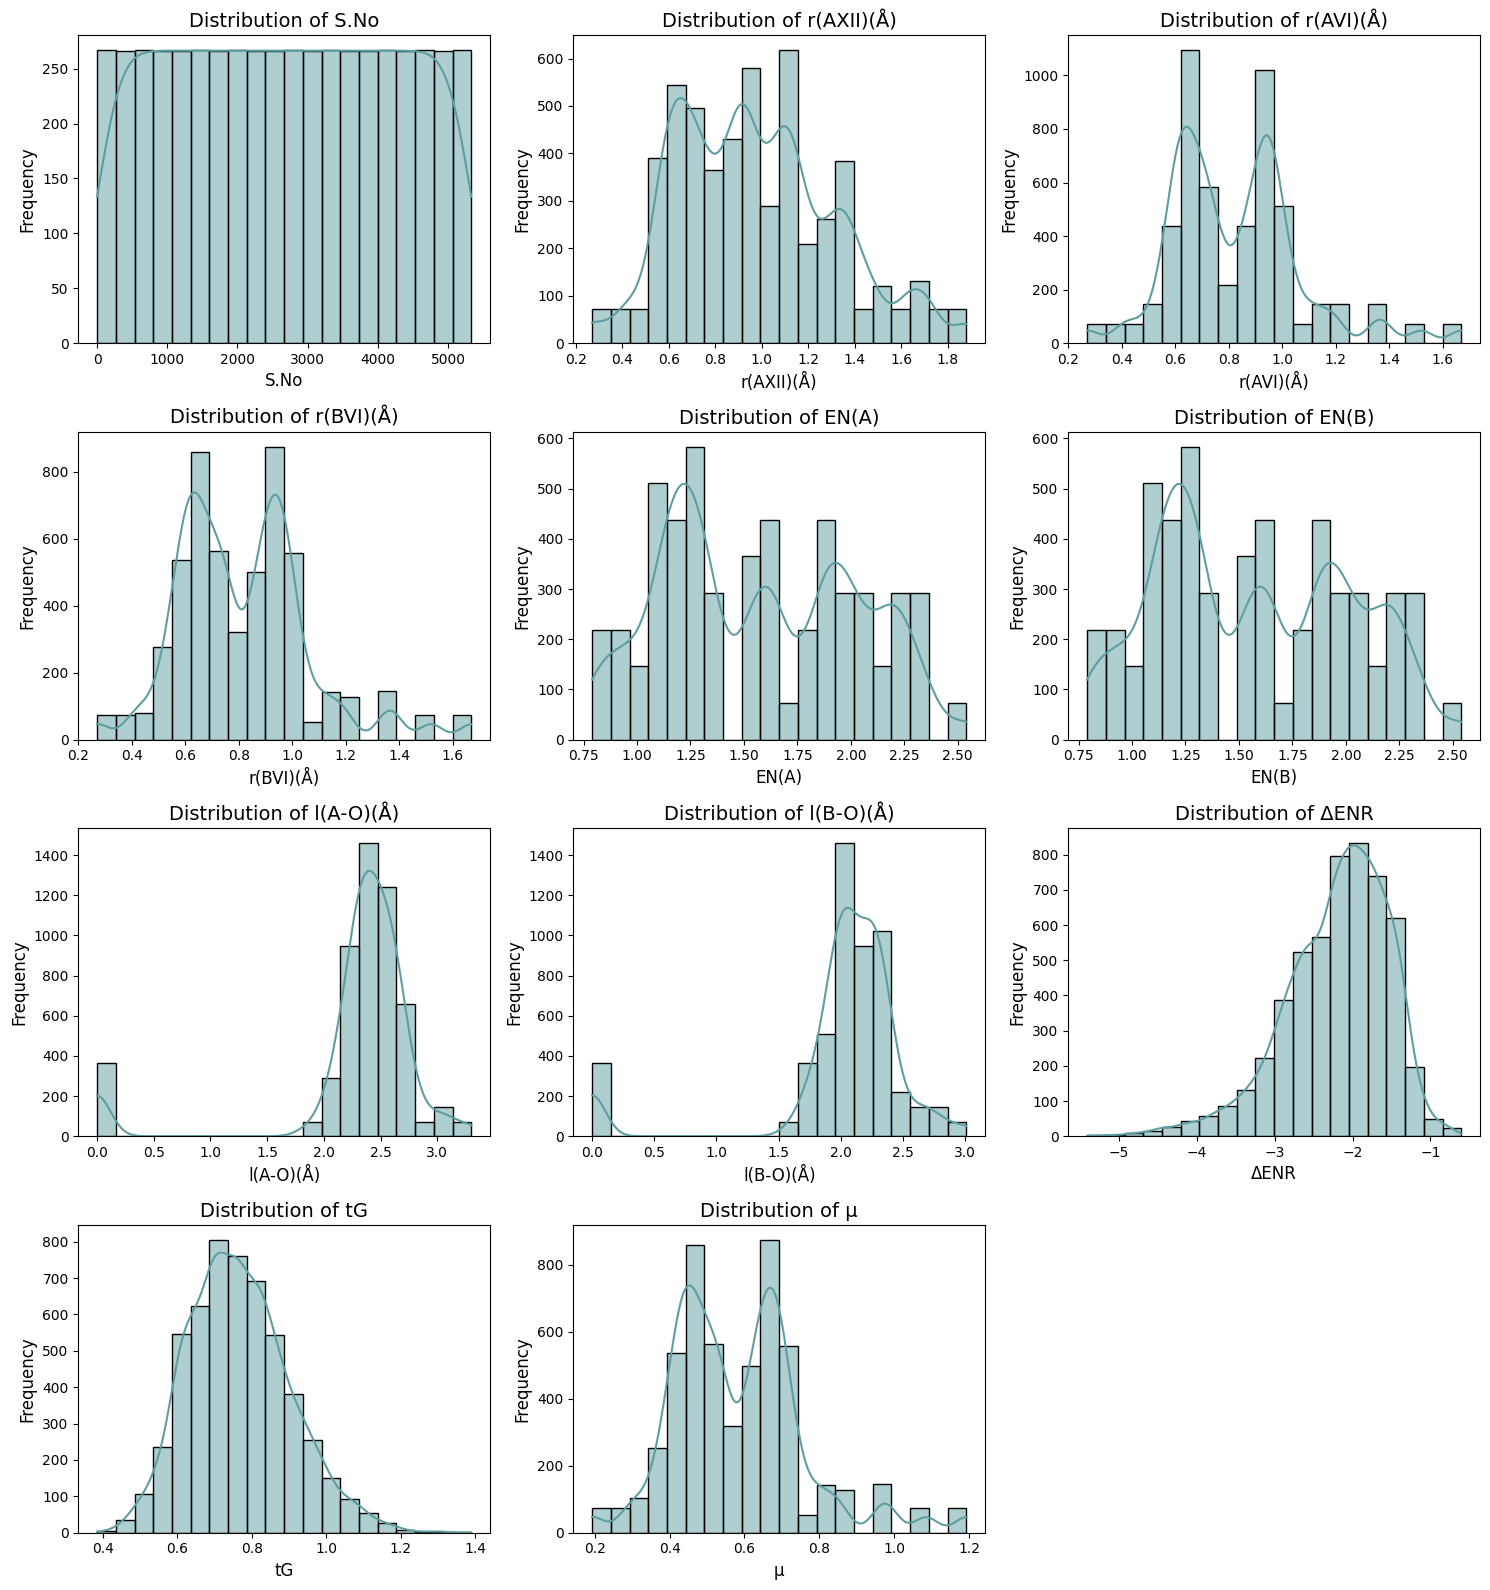

In [15]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

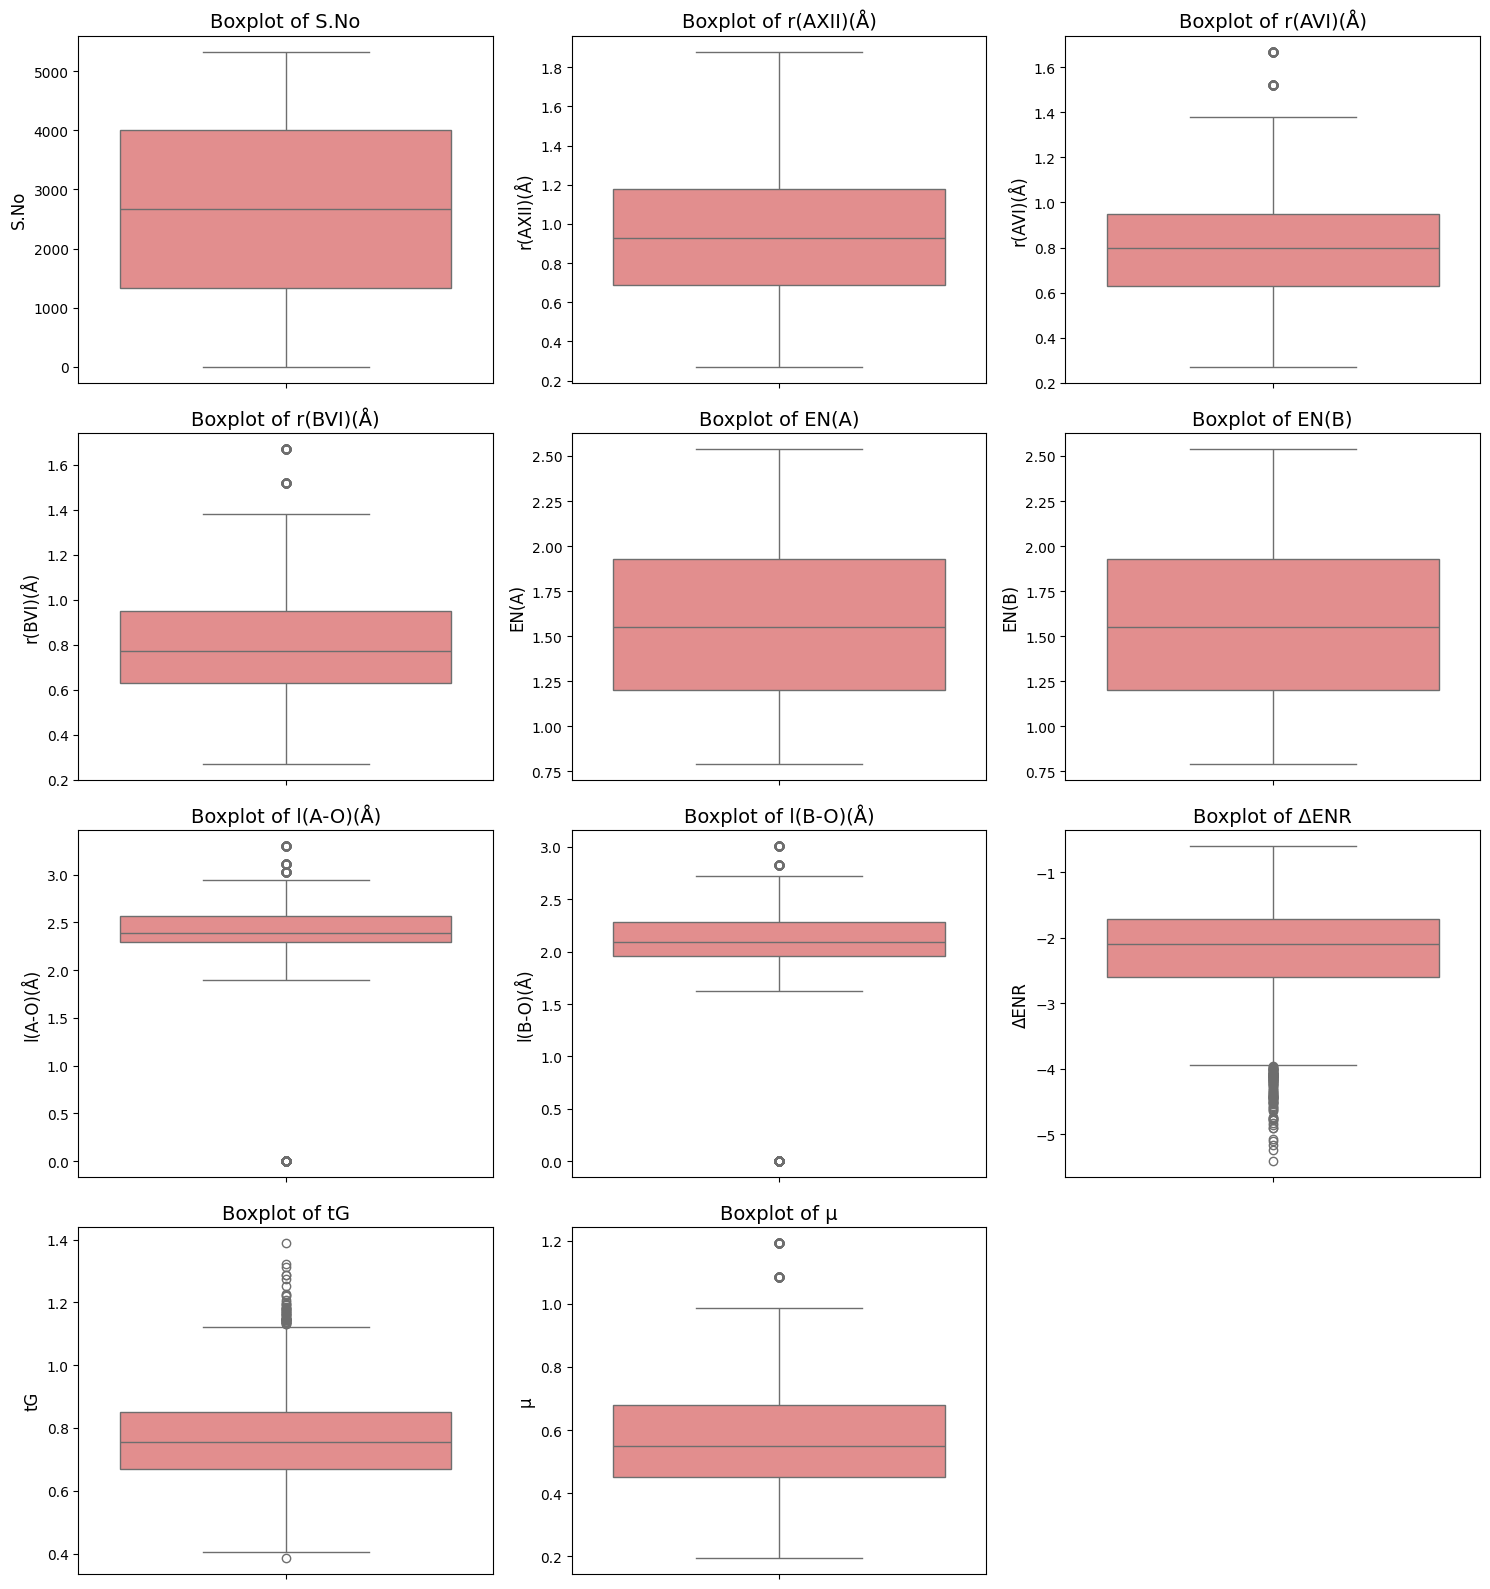

In [16]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

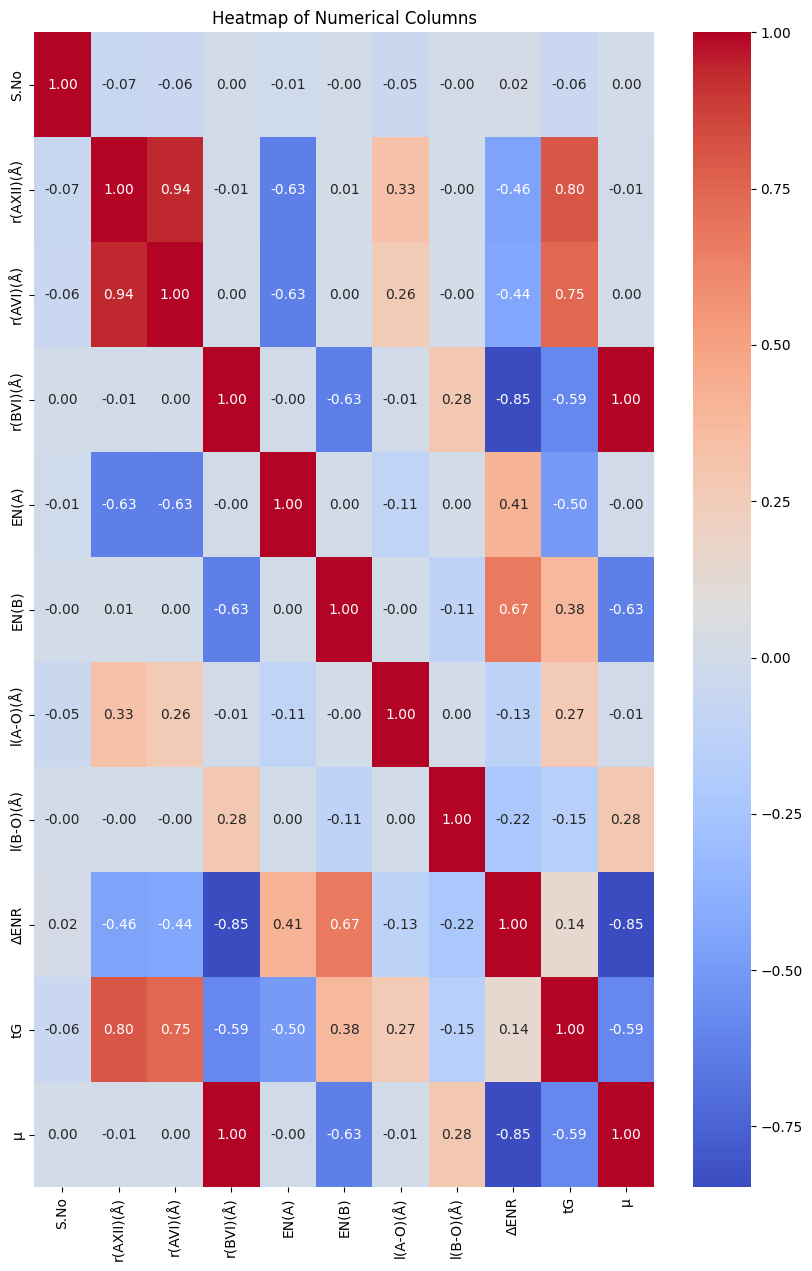

In [18]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 15))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [19]:
# Dropping id column

df.drop(columns=['S.No'], inplace=True)

In [21]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col].astype(str))

In [23]:
X = df.drop(columns=['Lowest distortion'])
y = df['Lowest distortion']

In [24]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [26]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [28]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.6585365853658537, 0.6425891181988743, 0.7664165103189493, 0.7682926829268293, 0.626641651031895, 0.7382739212007504, 0.7514071294559099, 0.701688555347092, 0.7063789868667918]


## Model Evalaution

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.68      0.92      0.78       650
           2       0.56      0.32      0.41       302
           3       0.00      0.00      0.00        70
           4       0.50      0.12      0.20        32

    accuracy                           0.66      1066
   macro avg       0.35      0.27      0.28      1066
weighted avg       0.59      0.66      0.60      1066

Confusion Matrix:
 [[  0  10   2   0   0]
 [  0 601  45   0   4]
 [  0 203  97   2   0]
 [  0  55  15   0   0]
 [  0  14  14   0   4]]


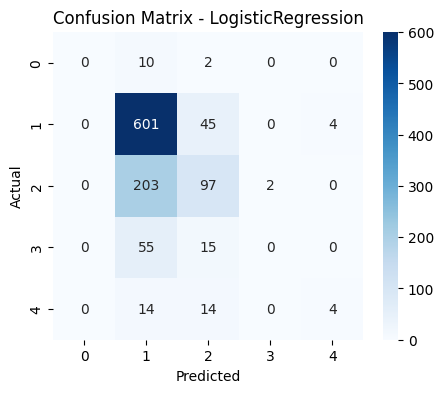

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.67      0.93      0.78       650
           2       0.51      0.27      0.35       302
           3       0.00      0.00      0.00        70
           4       0.00      0.00      0.00        32

    accuracy                           0.64      1066
   macro avg       0.24      0.24      0.23      1066
weighted avg       0.55      0.64      0.57      1066

Confusion Matrix:
 [[  0  10   2   0   0]
 [  0 604  46   0   0]
 [  0 221  81   0   0]
 [  0  55  15   0   0]
 [  0  18  14   0   0]]


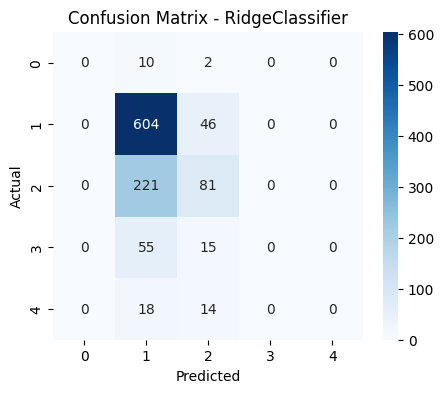

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.08      0.14        12
           1       0.84      0.89      0.86       650
           2       0.67      0.70      0.68       302
           3       0.44      0.21      0.29        70
           4       0.48      0.34      0.40        32

    accuracy                           0.77      1066
   macro avg       0.59      0.45      0.48      1066
weighted avg       0.75      0.77      0.75      1066

Confusion Matrix:
 [[  1   6   4   0   1]
 [  0 580  60   5   5]
 [  1  74 210  12   5]
 [  0  17  37  15   1]
 [  0  16   3   2  11]]


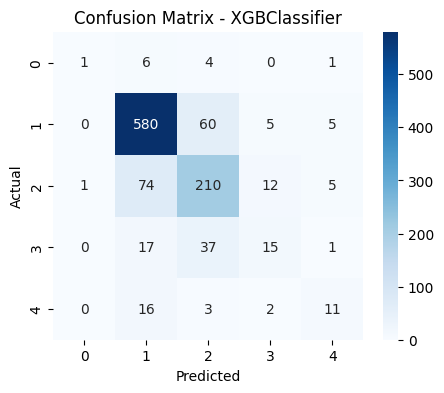

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.08      0.15        12
           1       0.82      0.92      0.87       650
           2       0.70      0.71      0.70       302
           3       0.52      0.17      0.26        70
           4       0.58      0.22      0.32        32

    accuracy                           0.78      1066
   macro avg       0.73      0.42      0.46      1066
weighted avg       0.76      0.78      0.76      1066

Confusion Matrix:
 [[  1   6   4   0   1]
 [  0 598  46   4   2]
 [  0  81 213   7   1]
 [  0  20  37  12   1]
 [  0  21   4   0   7]]


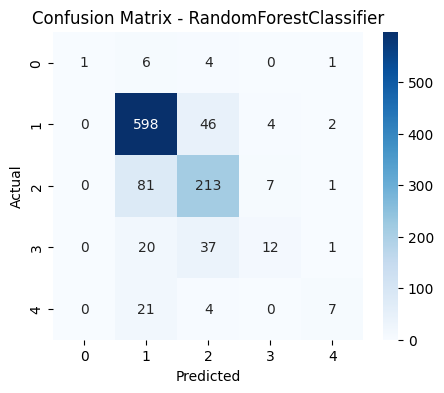

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.68      0.85      0.76       650
           2       0.45      0.38      0.41       302
           3       0.00      0.00      0.00        70
           4       0.00      0.00      0.00        32

    accuracy                           0.63      1066
   macro avg       0.23      0.25      0.23      1066
weighted avg       0.54      0.63      0.58      1066

Confusion Matrix:
 [[  0   9   3   0   0]
 [  0 554  96   0   0]
 [  0 188 114   0   0]
 [  0  50  20   0   0]
 [  0  13  19   0   0]]


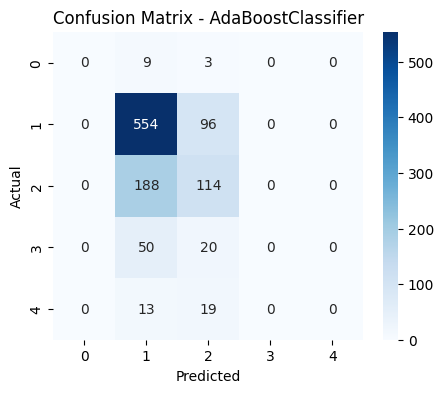

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.08      0.13        12
           1       0.79      0.91      0.84       650
           2       0.67      0.63      0.65       302
           3       0.31      0.06      0.10        70
           4       0.50      0.25      0.33        32

    accuracy                           0.75      1066
   macro avg       0.52      0.39      0.41      1066
weighted avg       0.71      0.75      0.72      1066

Confusion Matrix:
 [[  1   9   2   0   0]
 [  1 591  49   5   4]
 [  1 105 191   3   2]
 [  0  29  35   4   2]
 [  0  16   7   1   8]]


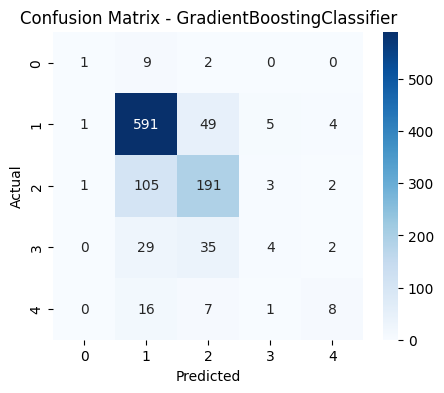

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.08      0.12        12
           1       0.80      0.90      0.85       650
           2       0.66      0.60      0.62       302
           3       0.41      0.17      0.24        70
           4       0.30      0.22      0.25        32

    accuracy                           0.74      1066
   macro avg       0.48      0.39      0.42      1066
weighted avg       0.71      0.74      0.72      1066

Confusion Matrix:
 [[  1   8   2   0   1]
 [  1 586  52   4   7]
 [  1 102 180  12   7]
 [  1  21  35  12   1]
 [  0  19   5   1   7]]


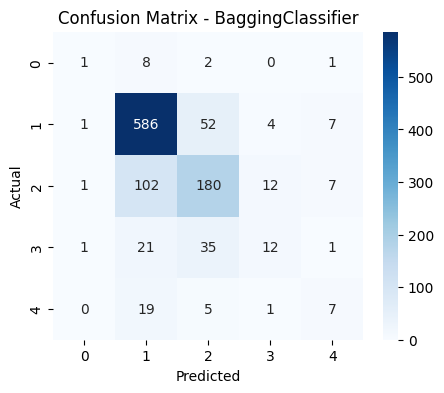

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.17      0.20        12
           1       0.80      0.80      0.80       650
           2       0.59      0.65      0.62       302
           3       0.27      0.21      0.24        70
           4       0.38      0.28      0.32        32

    accuracy                           0.70      1066
   macro avg       0.46      0.42      0.44      1066
weighted avg       0.69      0.70      0.69      1066

Confusion Matrix:
 [[  2   6   4   0   0]
 [  3 521  93  22  11]
 [  2  85 195  18   2]
 [  1  22  30  15   2]
 [  0  16   6   1   9]]


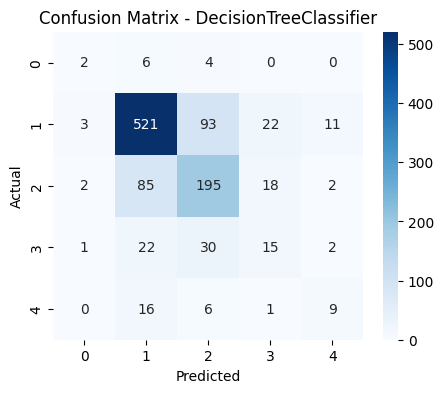

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.72      0.93      0.81       650
           2       0.65      0.49      0.56       302
           3       0.00      0.00      0.00        70
           4       1.00      0.06      0.12        32

    accuracy                           0.71      1066
   macro avg       0.47      0.30      0.30      1066
weighted avg       0.65      0.71      0.66      1066

Confusion Matrix:
 [[  0  11   1   0   0]
 [  0 604  46   0   0]
 [  0 155 147   0   0]
 [  0  44  26   0   0]
 [  0  24   6   0   2]]


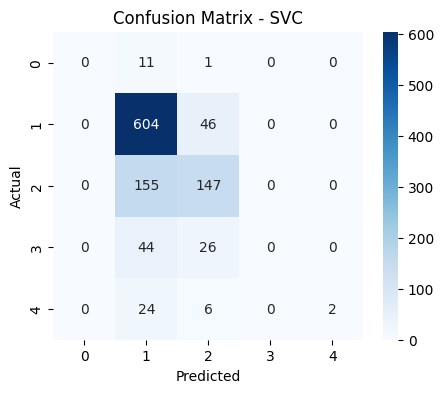

In [29]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()